## <span style="color:green">**Validation**</span> : pybreathe package. Case study of the $sin$ function.

Import of required modules (just for the example) &#8628;

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Import of the *home-made* pybreathe package &#8628;

In [2]:
from pybreathe import BreathingFlow

Generation of a pseudo respiratory air flow rate: the sinus function.

$$
\begin{aligned}
f : \mathbb{R} &\longrightarrow \mathbb{R} \\
x &\longmapsto \sin(x)
\end{aligned}
$$

Sinus creation and storage in a dataframe &#8628;

In [3]:
x = np.linspace(0, 10*(2*np.pi), 10_000)
y = np.sin(x) 
data = pd.DataFrame({"time": x, "values": y})
data.head()

,time,values
0,0.000000,0.000000
1,0.006284,0.006284
2,0.012568,0.012567
3,0.018851,0.018850
4,0.025135,0.025133


Sinus plot &#8628;

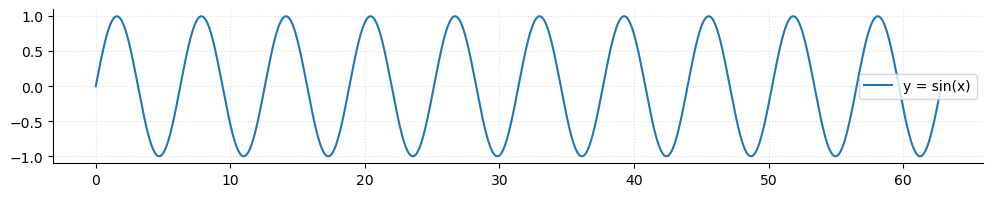

In [4]:
fig, ax = plt.subplots(figsize=(12,2))
ax.plot(x, y, label="y = sin(x)")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(alpha=0.4, linestyle=":", ms=0.1)
ax.legend()

Instantiation of an object of type **BreathingFlow** with sinusoidal data &#8628;

In [5]:
flow = BreathingFlow.from_dataframe(df=data, identifier="sinus")

Call the **plot** method: simple plotting of the air flow &#8628;

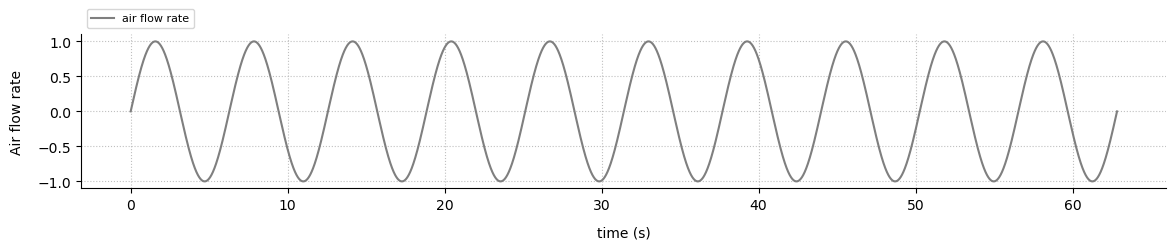

In [6]:
flow.plot()

Call the **plot** method with the option **show_segments** set to **True**: plotting the air flow by distinguishing between the positive and negative segments &#8628;

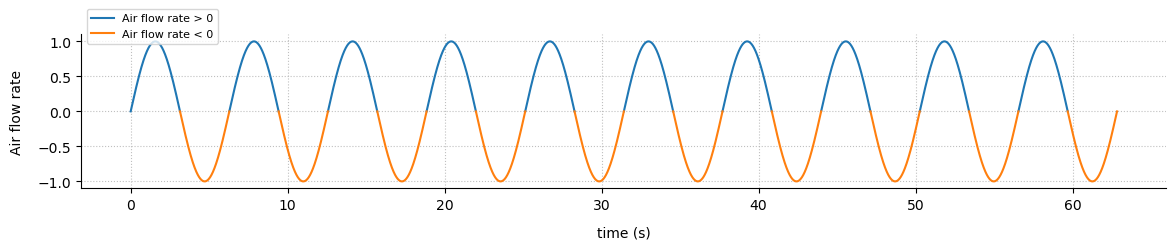

In [7]:
flow.plot(show_segments=True)

Call the **plot** method with the option **show_auc** set to **True**: plotting the air flow by distinguishing between the positive and negative AUC (Area Under the Curve).<br> 
Yellow dots represent the points at which the flow crosses the x-axis.<br> 
These are the $x_{0}$ such that $f(x_0) = 0$, i.e., $\sin(x_0) = 0$.

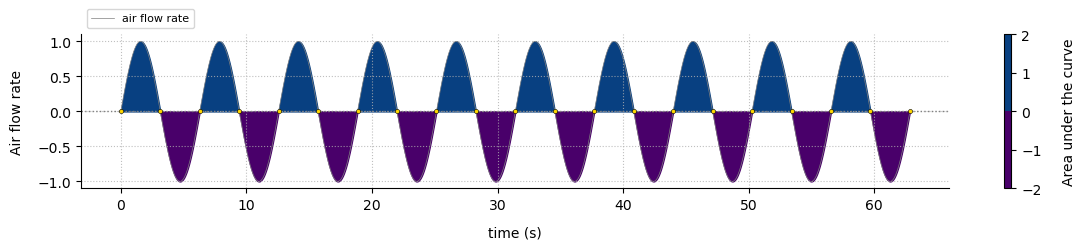

In [8]:
flow.plot(show_auc=True)

Call the **get_positive_auc_time()** method: returns the mean duration of segments for which the air flow rate is positive.<br>
In the case of the $\sin$ function:<br>

>The $\sin$ function is $2\pi- \text{periodic}$ and $\sin(x) \geq 0 \quad \Leftrightarrow \quad 0 \leq x \leq \pi \quad [2\pi]$ 

Thus, the mean duration of positive segments of the $\sin$ function is exactly $\pi \quad (\pi - 0) $. </br>
The **get_positive_auc_time()** method returns the mean duration of segments, the standard deviation of the durations and the number of segments over which the mean is calculated. </br>
In the case of the $\sin$ function, we would expect that the mean to be $\pi$, and the standard deviation close to 0 because the segments all have exactly the same duration ($\pi$).

In [9]:
flow.get_positive_auc_time()

mean = 3.14 ± 9.19e-10 (n = 10).


(3.14, 9.19e-10, 10)

Call the **get_negative_auc_time()** method: returns the mean duration of segments for which the air flow rate is negative.<br>
In the case of the $\sin$ function:<br>

>The $\sin$ function is $2\pi- \text{periodic }$ and $\sin(x) \leq 0 \quad \Leftrightarrow \quad \pi \leq x \leq 2\pi \quad [2\pi]$

Thus, the mean duration of negative segments of the $\sin$ function is exactly $\pi \quad (2\pi - \pi)$. </br>
The **get_negative_auc_time()** method returns the mean duration of segments, the standard deviation of the durations and the number of segments over which the mean is calculated. </br>
In the case of the $\sin$ function, we would expect that the mean to be $\pi$, and the standard deviation close to 0 because the segments all have exactly the same duration ($\pi$).

In [10]:
flow.get_negative_auc_time()

mean = 3.14 ± 9.19e-10 (n = 10).


(3.14, 9.19e-10, 10)

Four optional arguments are available for these two methods: 
- return_mean (Defaults to True): to return all values or only the mean.
- verbose (Defaults to True): to print results in human readable format
- n_digits (Defaults to 3): to round durations to n_digits significant digits
- threshold (Defaults to 0): to ignore values below the threshold

In [11]:
flow.get_positive_auc_time(return_mean=False)

(3.14, 3.14, 3.14, 3.14, 3.14, 3.14, 3.14, 3.14, 3.14, 3.14)

In [12]:
flow.get_positive_auc_time(return_mean=False, n_digits=4)

(3.142, 3.142, 3.142, 3.142, 3.142, 3.142, 3.142, 3.142, 3.142, 3.142)

In [13]:
flow.get_positive_auc_time(return_mean=False, n_digits=4, threshold=4.0)

()

Call the **get_positive_auc_value()** method: returns the mean AUC value of segments for which the air flow rate is positive.<br>
In the case of the $\sin$ function:<br>

>The $\sin$ function is $2\pi- \text{periodic}$ and $\sin(x) \geq 0 \quad \Leftrightarrow \quad 0 \leq x \leq \pi \quad [2\pi]$

So, $\forall x_0 \in \mathbb{R},\quad x_0 \equiv 0 \quad [2\pi] :$

$$
\begin{aligned}
\int_{x_0}^{x_0 + \pi} \sin t \, dt 
&= \left[-\cos(t)\right]_{x_0}^{x_0 + \pi} \\
&= -\cos(x_0 + \pi) - ( - \cos(x_0)) \\
&= -\cos(\pi) - ( - \cos(0)) \\
&= -\cos(\pi) + \cos(0) \\
&= -(-1) + 1 \\
&= 1 + 1 \\
&= 2
\end{aligned}
$$

Thus, the mean AUC value of positive segments of the $\sin$ function is exactly $2$. </br>
The **get_positive_auc_value()** method returns the mean AUC value of segments, the standard deviation of the AUC values and the number of segments over which the mean is calculated. </br>
In the case of the $\sin$ function, we would expect that the mean to be $2$, and the standard deviation close to 0 because the segments all have exactly the same AUC value ($2$).

In [14]:
flow.get_positive_auc_value()

mean = 2.0 ± 8.4e-12 (n = 10).


(2.0, 8.4e-12, 10)

Call the **get_negative_auc_value()** method: returns the mean AUC value of segments for which the air flow rate is negative.<br>
In the case of the $\sin$ function:<br>

>The $\sin$ function is $2\pi- \text{periodic }$ and $\sin(x) \leq 0 \quad \Leftrightarrow \quad \pi \leq x \leq 2\pi \quad [2\pi]$

So, $\forall x_0 \in \mathbb{R},\quad x_0 \equiv \pi \quad [2\pi] :$

$$
\begin{aligned}
\int_{x_0}^{x_0 + \pi} \sin t \, dt 
&= \left[-\cos(t)\right]_{x_0}^{x_0 + \pi} \\
&= -\cos(x_0 + \pi) - ( - \cos(x_0)) \\
&= -\cos(2\pi) - ( - \cos(\pi)) \\
&= -\cos(2\pi) + \cos(\pi) \\
&= -\cos(0) + \cos(\pi) \\
&= -1 + (-1) \\
&= -1 -1 \\
&= -2
\end{aligned}
$$

Thus, the mean AUC value of negative segments of the $\sin$ function is exactly $-2$. </br>
The **get_negative_auc_value()** method returns the mean AUC value of segments, the standard deviation of the AUC values and the number of segments over which the mean is calculated. </br>
In the case of the $\sin$ function, we would expect that the mean to be $-2$, and the standard deviation close to 0 because the segments all have exactly the same AUC value ($-2$).

In [15]:
flow.get_negative_auc_value()

mean = -2.0 ± 8.4e-12 (n = 10).


(-2.0, 8.4e-12, 10)

Four optional arguments are available for these two methods: 
- return_mean (Defaults to True): to return all values or only the mean.
- verbose (Defaults to True): to print results in human readable format
- n_digits (Defaults to 3): to round durations to n_digits significant digits
- threshold (Defaults to 0): to ignore values below the threshold

In [16]:
flow.get_positive_auc_value(return_mean=False)

(2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0)

In [17]:
flow.get_positive_auc_value(return_mean=False, n_digits=6)

(1.99999,
 1.99999,
 1.99999,
 1.99999,
 1.99999,
 1.99999,
 1.99999,
 1.99999,
 1.99999,
 1.99999)

In [18]:
flow.get_positive_auc_value(return_mean=False, n_digits=6, threshold=2.0)

()